In [14]:
import networkx as nx # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [15]:
# Create a directed graph
attack_graph = nx.DiGraph()

# Define edges according to the original R code’s structure
edges = [
    (1, 2),             # 1 -> 2
    (2, 3), (2, 4), (2, 5),  # 2 -> 3,4,5 
    (3, 6), (4, 6),          # 3,4 -> 6
    (5, 7), (7, 8), (8, 9)   # 5 -> 7 -> 8 -> 9
]

attack_graph.add_edges_from(edges)

In [ ]:
# Set default "DEFAULT_WEIGHT_VALUE = 0" for all edges, because we noticed that 
# weight of 0 leads to a hardness of 1 which is what we want for trivial edges
nx.set_edge_attributes(attack_graph, DEFAULT_WEIGHT_VALUE, 'weight')

# Compute topological order of nodes
node_order = list(nx.topological_sort(attack_graph))

In [17]:
# print("DEBUG: Number of nodes in attack_graph:", attack_graph.number_of_nodes())
# print("DEBUG: Number of edges in attack_graph:", attack_graph.number_of_edges())
# print("DEBUG: Edges in the attack_graph (with attributes):")
# for u, v, data in attack_graph.edges(data=True):
#     print(f"  {u} -> {v}, weight={data['weight']}")

# print("DEBUG: Topological order of nodes:", node_order)

In [18]:
# pos = nx.spring_layout(attack_graph, seed=42)  # for reproducible layout
# nx.draw(attack_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray')
# plt.title("Debug Visualization of Attack Graph")
# plt.show()

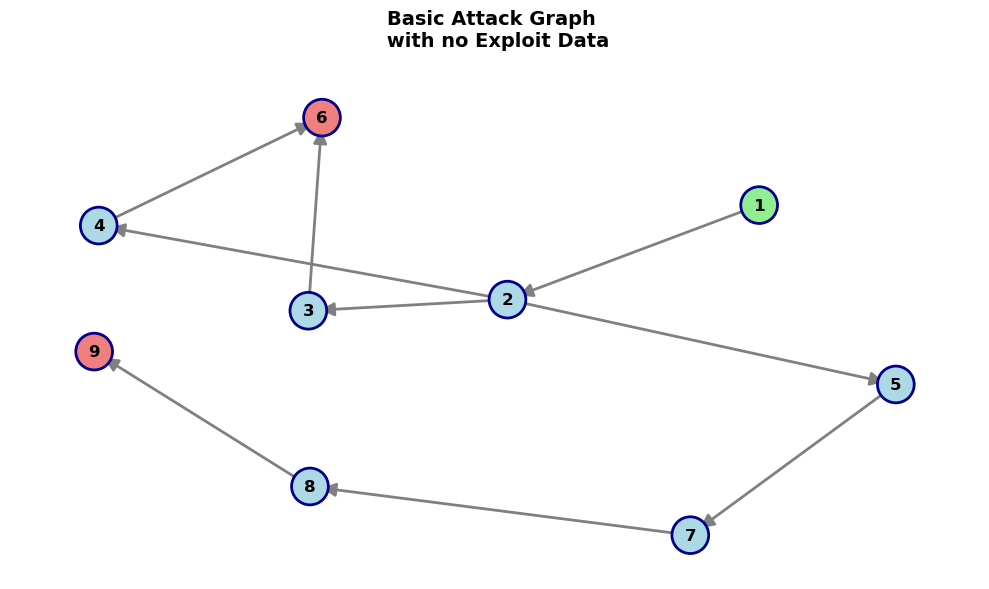

In [ ]:
import numpy as np
# Use hierarchical layout with adjusted parameters
pos = nx.spring_layout(attack_graph, k=1, iterations=50, seed=42)

# Manual adjustment to separate nodes 3 and 4
pos[3] = pos[3] + np.array([0.1, 0.1])  # Move node 3 up and right
pos[4] = pos[4] + np.array([-0.1, -0.1])  # Move node 4 down and left

plt.figure(figsize=(10, 6))

# Draw edges with arrows
nx.draw_networkx_edges(attack_graph, pos, 
                      edge_color='gray',
                      arrows=True,
                      arrowsize=20,
                      width=2)

# Create color map for nodes
node_colors = ['lightblue'] * len(attack_graph)  # Default color
node_colors[0] = 'lightgreen'  # Node 1
node_colors[5] = 'lightcoral'  # Node 6 
node_colors[8] = 'lightcoral'  # Node 9
node_colors[4] = 'lightblue'      # Node 5

# Draw nodes
nx.draw_networkx_nodes(attack_graph, pos,
                      node_color=node_colors,
                      node_size=700,
                      edgecolors='darkblue',
                      linewidths=2)

# Create two separate label dictionaries - using actual node numbers
#white_labels = {5: '5'}  # Only purple node gets white label
black_labels = {1: '1', 2: '2', 3: '3', 4: '4',5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

# Draw labels separately
nx.draw_networkx_labels(attack_graph, pos,
                       font_size=12,
                       font_weight='bold',
                       font_color='white')

nx.draw_networkx_labels(attack_graph, pos,
                       black_labels,
                       font_size=12,
                       font_weight='bold')

plt.title("Basic Attack Graph \n with no Exploit Data", pad=20, fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()